<html>
    <body>
    <h1 style="color:#483D8B;text-align:center;">Human Foetal Samples - Smart-Seq2</h1> 
    <h2 style="color:#483D8B;text-align:center;">Downstream analysis of 15 samples (Autoencoder)</h2>
    <br>02 September 2020 @ Sanger WTSI
    <hr style="color:#483D8B;solid #483D8B;height: 1px;">
    <h3 style="color:#483D8B;">Andrea Tangherloni, PhD</h3><br>
    Research Associate – University of Cambridge<br>
    <b> Cvejic Group </b><br>
    School of Clinical Medicine – Department of Haematology<br>
    Wellcome Trust – Medical Research Council<br>
    Cambridge Stem Cell Institute – Sanger<br>
    <br>
    <em>
        <span style="color:#483D8B;"><b>Address:</b></span> Wellcome Genome Campus,<br>
        Hinxton, Cambridge, CB10 1HH<br>
        United Kingdom<br>
        <span style="color:#483D8B;"><b>Email:</b></span>
            <a href="mailto:at860@cam.ac.uk">at860@cam.ac.uk</a> <br>
        <span style="color:#483D8B;"><b>Email:</b></span>
            <a href="mailto:at19@sanger.ac.uk">at19@sanger.ac.uk</a> <br>
    </em>
    <hr style="color:#483D8B;solid #483D8B;height: 1px;">   
    <h3 style="color:#483D8B;">Simone G. Riva, MSc</h3><br>
    <b> Cvejic Group </b><br>
    School of Clinical Medicine – Department of Haematology<br>
    Wellcome Trust – Medical Research Council<br>
    Cambridge Stem Cell Institute – Sanger<br>
    <br>
    <em>
        <span style="color:#483D8B;"><b>Address:</b></span> Wellcome Genome Campus,<br>
        Hinxton, Cambridge, CB10 1HH<br>
        United Kingdom<br>
        <span style="color:#483D8B;"><b>Email:</b></span>
            <a href="mailto:sgr34@cam.ac.uk">at860@cam.ac.uk</a> <br>
        <span style="color:#483D8B;"><b>Email:</b></span>
            <a href="mailto:sr31@sanger.ac.uk">at19@sanger.ac.uk</a> <br>
    </em>
    <hr style="color:#483D8B;solid #483D8B;height: 1px;">
    </body>
</html>

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import cm
import seaborn as sns
import sys

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

sys.path.append('../Functions/scaespy/')
sys.path.append("../Functions")

from core import scAEspy
from scRNA_functions import scRNA_functions

random_state = 8

We are assuming that scAEspy is in the folder Functions/scaespy. Please, download it from https://gitlab.com/cvejic-group/scaespy

In [2]:
fc = scRNA_functions()

 * Initialising ...


# Loading Scanpy object

In [3]:
merged = sc.read_h5ad('../Data/ScanpyObjets/MergedAllSamples.h5ad')

In [4]:
sc.pp.filter_genes(merged, min_cells=10)

In [5]:
print("Remaining genes: %d"%merged.n_vars)
print("Remaining cells: %d"%merged.n_obs)

Remaining genes: 29680
Remaining cells: 4504


# scAEspy

## Batch assignment - each batch corresponds to a sample

In [6]:
merged.obs['batch'] = 'No'
cells = merged.obs['batch'][merged.obs['sample'] == "Sample1"]
merged.obs['batch'].replace(cells, 0, inplace=True)
cells = merged.obs['batch'][merged.obs['sample'] == "Sample2"]
merged.obs['batch'].replace(cells, 1, inplace=True)
cells = merged.obs['batch'][merged.obs['sample'] == "Sample3"]
merged.obs['batch'].replace(cells, 2, inplace=True)
cells = merged.obs['batch'][merged.obs['sample'] == "Sample4"]
merged.obs['batch'].replace(cells, 3, inplace=True)
cells = merged.obs['batch'][merged.obs['sample'] == "Sample5"]
merged.obs['batch'].replace(cells, 4, inplace=True)
cells = merged.obs['batch'][merged.obs['sample'] == "Sample6"]
merged.obs['batch'].replace(cells, 5, inplace=True)
cells = merged.obs['batch'][merged.obs['sample'] == "Sample7"]
merged.obs['batch'].replace(cells, 6, inplace=True)
cells = merged.obs['batch'][merged.obs['sample'] == "Sample8"]
merged.obs['batch'].replace(cells, 7, inplace=True)
cells = merged.obs['batch'][merged.obs['sample'] == "Sample9"]
merged.obs['batch'].replace(cells, 8, inplace=True)
cells = merged.obs['batch'][merged.obs['sample'] == "Sample10"]
merged.obs['batch'].replace(cells, 9, inplace=True)
cells = merged.obs['batch'][merged.obs['sample'] == "Sample11"]
merged.obs['batch'].replace(cells, 10, inplace=True)
cells = merged.obs['batch'][merged.obs['sample'] == "Sample12"]
merged.obs['batch'].replace(cells, 11, inplace=True)
cells = merged.obs['batch'][merged.obs['sample'] == "Sample13"]
merged.obs['batch'].replace(cells, 12, inplace=True)
cells = merged.obs['batch'][merged.obs['sample'] == "Sample14"]
merged.obs['batch'].replace(cells, 13, inplace=True)
cells = merged.obs['batch'][merged.obs['sample'] == "Sample15"]
merged.obs['batch'].replace(cells, 14, inplace=True)

merged.obs['batch'] = merged.obs.batch.astype('category')

In [7]:
np.unique(merged.obs['batch'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

## Normalization - log trasformation for HVG detection

In [8]:
merged_norm = merged.copy()
merged_norm.layers["counts"] = merged.X

sc.pp.normalize_per_cell(merged_norm, counts_per_cell_after=1e4)
sc.pp.log1p(merged_norm)

merged_norm.raw = merged_norm

merged_norm.layers["log"] = merged_norm.raw.X

## Highly Variable Genes calculated considering the 15 batches

 * Highly Variable Genes


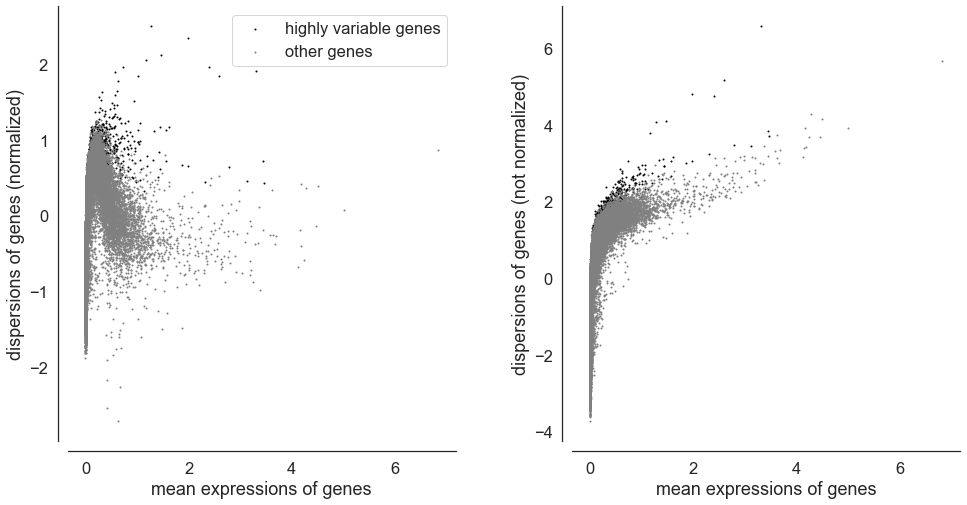

 	* Number of control HVGs: 1000



In [9]:
n_top_genes=1000

print(" * Highly Variable Genes")
sc.pp.highly_variable_genes(merged_norm, n_top_genes=n_top_genes, batch_key="batch")

fc.plotHVGs(merged_norm)
print(" \t* Number of control HVGs: %d\n"%(merged_norm[:, merged_norm.var['highly_variable']].n_vars))

## Scale data to unit variance and zero mean

In [10]:
sc.pp.scale(merged_norm, max_value=10)

## Taking the counts of the HVGs

In [11]:
data   = merged[:, merged_norm.var['highly_variable']].X

print(" * Total number of genes: %d"%(data.shape[1]))
print(" \t-> Min expr=%.1f"%(np.min(data)))
print(" \t-> Max expr=%.1f"%(np.max(data)))

merged = merged_norm
merged.layers["scaled"] = merged.X

 * Total number of genes: 1000
 	-> Min expr=0.0
 	-> Max expr=1401027.0


##  GMMMDVAE

In [12]:
data_shuffled = shuffle(data, random_state=random_state)

In [13]:
original_dim    = data_shuffled.shape[1]
hidden_layers   = [64]
latent_space    = 16
num_gaussians   = 15
learnable_prior = True
rec_loss        = "Poisson"
constrained     = True
activation      ='sigmoid'

alpha = 0
lambd = 2

In [14]:
GMMMDVAE = scAEspy(original_dim,
                   hidden_layers=hidden_layers,
                   latent_layer=latent_space,
                   learnable_prior=learnable_prior,
                   constrained=constrained,
                   num_gaussians=num_gaussians,
                   activation=activation,
                   rec_loss=rec_loss,
                   alpha=alpha,
                   lambd=lambd,
                   seed=42,
                   verbose=True)

GMMMDVAE.build()

 * Using 1 hidden layers [64]
 * Latent space: 16 dimensions
 * Using <function sigmoid at 0x7fa0d93e9a60> as activation function
 * Setting seed to 42 for reproducibility


 * Epoch:  1
     tr_kly,     tr_klz,     tr_mmd,     tr_rec,      t_kly,      t_klz,      t_mmd,      t_rec
 3.0371e-01, 3.6444e+01, 4.5499e-01, -1.7788e+05, 3.0371e-01, 3.6396e+01, 4.5500e-01, -1.7790e+05
	 tr_distinct clusters (15):  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
	 tr_distinct clusters %:  [0.01 0.01 0.02 0.06 0.03 0.03 0.23 0.29 0.22 0.   0.   0.   0.   0.11
 0.  ]
	 t_distinct clusters (15):  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
	 t_distinct clusters %:  [0.01 0.01 0.02 0.06 0.03 0.03 0.23 0.29 0.22 0.   0.   0.   0.   0.11
 0.  ]
 * Train: -177845.556
 * Test:  -177858.464
 * -> A better loss value has been found


 * Epoch:  2
     tr_kly,     tr_klz,     tr_mmd,     tr_rec,      t_kly,      t_klz,      t_mmd,      t_rec
 2.9193e-01, 3.9545e+01, 4.9069e-01, -1.9570e+05, 2.9193e-01, 3.9560e+01, 4.9034e-01, -1.9574e+05
	 tr_distinct clusters (15):  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
	 tr_distinct clusters %:  [0.02 0.   0.04 0.1  0.06 0.01 0.

     tr_kly,     tr_klz,     tr_mmd,     tr_rec,      t_kly,      t_klz,      t_mmd,      t_rec
 2.8667e-01, 4.6734e+01, 1.1226e-01, -2.2437e+05, 2.8667e-01, 4.6758e+01, 1.1252e-01, -2.2437e+05
	 tr_distinct clusters (10):  [ 0  2  3  4  6  7  8  9 13 14]
	 tr_distinct clusters %:  [0.28 0.   0.14 0.   0.   0.57 0.01 0.   0.   0.  ]
	 t_distinct clusters (10):  [ 0  2  3  4  6  7  8  9 13 14]
	 t_distinct clusters %:  [0.28 0.   0.14 0.   0.   0.57 0.01 0.   0.   0.  ]
 * Train: -224324.993
 * Test:  -224324.808
 * -> A better loss value has been found


 * Epoch:  16
     tr_kly,     tr_klz,     tr_mmd,     tr_rec,      t_kly,      t_klz,      t_mmd,      t_rec
 2.8832e-01, 4.6996e+01, 1.0211e-01, -2.2518e+05, 2.8832e-01, 4.7030e+01, 1.0189e-01, -2.2518e+05
	 tr_distinct clusters (9):  [ 0  3  6  7  8  9 10 13 14]
	 tr_distinct clusters %:  [0.22 0.12 0.02 0.64 0.   0.   0.   0.   0.  ]
	 t_distinct clusters (9):  [ 0  3  6  7  8  9 10 13 14]
	 t_distinct clusters %:  [0.22 0.12 0.02 

     tr_kly,     tr_klz,     tr_mmd,     tr_rec,      t_kly,      t_klz,      t_mmd,      t_rec
 4.3985e-01, 4.9745e+01, 5.6253e-02, -2.3136e+05, 4.3985e-01, 4.9758e+01, 5.6059e-02, -2.3136e+05
	 tr_distinct clusters (4):  [ 0  3  7 14]
	 tr_distinct clusters %:  [0.93 0.07 0.   0.  ]
	 t_distinct clusters (4):  [ 0  3  7 14]
	 t_distinct clusters %:  [0.93 0.07 0.   0.  ]
 * Train: -231308.364
 * Test:  -231310.705
 * -> A better loss value has been found


 * Epoch:  32
     tr_kly,     tr_klz,     tr_mmd,     tr_rec,      t_kly,      t_klz,      t_mmd,      t_rec
 4.2160e-01, 4.9911e+01, 5.5019e-02, -2.3149e+05, 4.2160e-01, 4.9937e+01, 5.4939e-02, -2.3149e+05
	 tr_distinct clusters (4):  [ 0  3  7 14]
	 tr_distinct clusters %:  [0.93 0.07 0.   0.  ]
	 t_distinct clusters (4):  [ 0  3  7 14]
	 t_distinct clusters %:  [0.93 0.07 0.   0.  ]
 * Train: -231437.849
 * Test:  -231437.010
 * -> A better loss value has been found


 * Epoch:  33
     tr_kly,     tr_klz,     tr_mmd,     tr_re

     tr_kly,     tr_klz,     tr_mmd,     tr_rec,      t_kly,      t_klz,      t_mmd,      t_rec
 2.4058e-01, 5.1454e+01, 5.0240e-02, -2.3347e+05, 2.4058e-01, 5.1491e+01, 5.0323e-02, -2.3347e+05
	 tr_distinct clusters (5):  [ 0  3  7  9 14]
	 tr_distinct clusters %:  [0.94 0.06 0.   0.   0.  ]
	 t_distinct clusters (5):  [ 0  3  7  9 14]
	 t_distinct clusters %:  [0.94 0.06 0.   0.   0.  ]
 * Train: -233415.749
 * Test:  -233416.580
 * -> A better loss value has been found


 * Epoch:  50
     tr_kly,     tr_klz,     tr_mmd,     tr_rec,      t_kly,      t_klz,      t_mmd,      t_rec
 2.5291e-01, 5.1112e+01, 4.9871e-02, -2.3357e+05, 2.5291e-01, 5.1153e+01, 4.9929e-02, -2.3357e+05
	 tr_distinct clusters (4):  [ 0  3  9 14]
	 tr_distinct clusters %:  [0.92 0.06 0.02 0.01]
	 t_distinct clusters (4):  [ 0  3  9 14]
	 t_distinct clusters %:  [0.92 0.06 0.02 0.01]
 * Train: -233521.031
 * Test:  -233518.581
 * -> A better loss value has been found


 * Epoch:  51
     tr_kly,     tr_klz,     t

     tr_kly,     tr_klz,     tr_mmd,     tr_rec,      t_kly,      t_klz,      t_mmd,      t_rec
 2.7624e-01, 5.3748e+01, 4.1903e-02, -2.3483e+05, 2.7624e-01, 5.3769e+01, 4.1956e-02, -2.3483e+05
	 tr_distinct clusters (5):  [ 0  3  6  9 14]
	 tr_distinct clusters %:  [0.89 0.07 0.   0.04 0.  ]
	 t_distinct clusters (5):  [ 0  3  6  9 14]
	 t_distinct clusters %:  [0.89 0.07 0.   0.04 0.  ]
 * Train: -234779.439
 * Test:  -234778.280
 * -> A better loss value has been found


 * Epoch:  68
     tr_kly,     tr_klz,     tr_mmd,     tr_rec,      t_kly,      t_klz,      t_mmd,      t_rec
 2.9322e-01, 5.3393e+01, 4.2460e-02, -2.3485e+05, 2.9322e-01, 5.3401e+01, 4.2453e-02, -2.3485e+05
	 tr_distinct clusters (5):  [ 0  3  6  9 14]
	 tr_distinct clusters %:  [0.89 0.07 0.   0.04 0.  ]
	 t_distinct clusters (5):  [ 0  3  6  9 14]
	 t_distinct clusters %:  [0.89 0.07 0.   0.04 0.  ]
 * Train: -234792.954
 * Test:  -234798.408
 * -> A better loss value has been found


 * Epoch:  69
     tr_kly,  

     tr_kly,     tr_klz,     tr_mmd,     tr_rec,      t_kly,      t_klz,      t_mmd,      t_rec
 2.7990e-01, 5.5029e+01, 3.8190e-02, -2.3540e+05, 2.7990e-01, 5.4972e+01, 3.8229e-02, -2.3540e+05
	 tr_distinct clusters (3):  [0 3 9]
	 tr_distinct clusters %:  [0.9  0.06 0.04]
	 t_distinct clusters (3):  [0 3 9]
	 t_distinct clusters %:  [0.9  0.06 0.04]
 * Train: -235340.601
 * Test:  -235344.980
 * -> A better loss value has been found


 * Epoch:  87
     tr_kly,     tr_klz,     tr_mmd,     tr_rec,      t_kly,      t_klz,      t_mmd,      t_rec
 2.8252e-01, 5.4767e+01, 3.7844e-02, -2.3542e+05, 2.8252e-01, 5.4810e+01, 3.7832e-02, -2.3543e+05
	 tr_distinct clusters (3):  [0 3 9]
	 tr_distinct clusters %:  [0.9  0.06 0.04]
	 t_distinct clusters (3):  [0 3 9]
	 t_distinct clusters %:  [0.9  0.06 0.04]
 * Train: -235367.428
 * Test:  -235371.573
 * -> A better loss value has been found


 * Epoch:  88
     tr_kly,     tr_klz,     tr_mmd,     tr_rec,      t_kly,      t_klz,      t_mmd,      

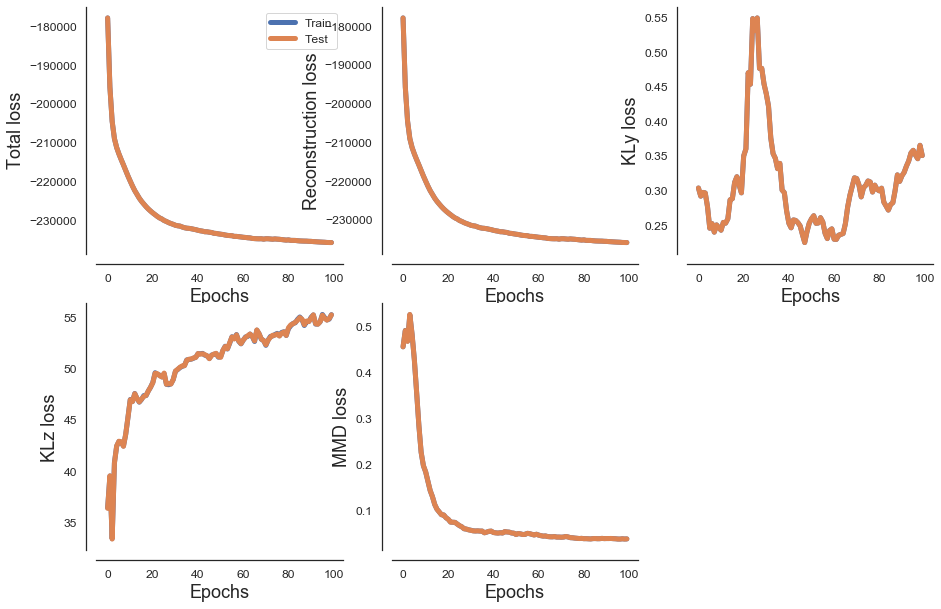

In [15]:
GMMMDVAE.train(data_shuffled, data_shuffled, epochs=100, batch_size=100)
GMMMDVAE.plotLosses()

## Latent space

In [16]:
cellsLatent = GMMMDVAE.latentRepresentation(data)

 * Only dataset1


/usr/local/lib/python3.6/dist-packages/numba/core/typed_passes.py:314: NumbaPerformanceWarning:


The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../usr/local/lib/python3.6/dist-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^


/usr/local/lib/python3.6/dist-packages/umap/nndescent.py:92: NumbaPerformanceWarning:


The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../usr/local/lib/python3.6/dist-packages/umap/utils.py", line 409:
@numba.njit(par

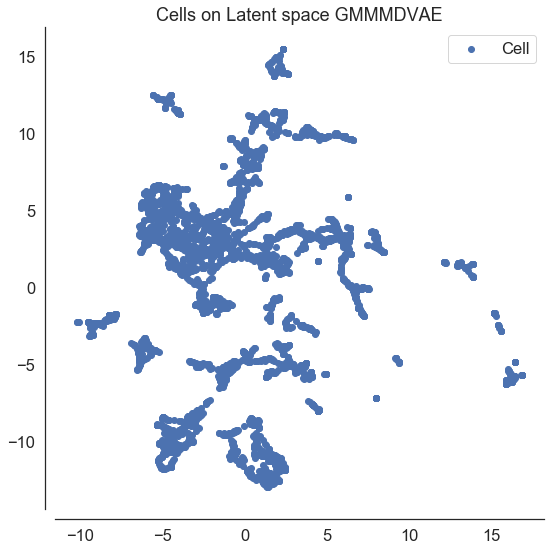

In [17]:
umapCellsLatent = fc.computeUMAP(dataset1=cellsLatent)

f, axs = plt.subplots(1,1,figsize=(8,8))
sns.set(font_scale=1.5)
sns.set_style("white")

fc.plotScatterDatasets(dataset1=umapCellsLatent,
                       axis=axs,
                       label1="Cell",
                       title="Cells on Latent space GMMMDVAE")

sns.despine(offset=10, trim=False)
plt.tight_layout()
plt.show()

In [18]:
merged.obsm['X_latent']  = np.zeros((merged.shape[0], latent_space))

for idx,cell in enumerate(cellsLatent):
    merged.obsm['X_latent'][idx] = cell

merged.obsm['X_pca'] = merged.obsm['X_latent']

In [19]:
merged.write('../Data/ScanpyObjets/MergedAllSamples_GMMMDVAE.h5ad', compression='gzip')